Primer cal fer una comporvació de la connexió, en aquest cas la faig amb el codi que es pot veure a sota.

In [ ]:
#testador de la connexió
#py -3.13 -m pip install requests
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='transaccions',
                                         user='root',
                                         password='1312')
    if connection.is_connected():
        db_Info = connection.server_info
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


In [ ]:
import mysql.connector
import pandas as pd
pd.set_option("display.max_rows", 20) #Serveix per aconseguir que em mostri múltiples files en funció del valor indicat.

connection = mysql.connector.connect(
    host='localhost',
    database='transaccions',
    user='root',
    password='1312')

# Convertir tot en dataframe i després en CSV

companyies = pd.read_sql("SELECT * FROM companyies", connection)
estat_targetes = pd.read_sql("SELECT * FROM estat_targetes", connection)
productes = pd.read_sql("SELECT * FROM productes", connection)
prodxtrans = pd.read_sql("SELECT * FROM prodxtrans", connection)
targetes_credit = pd.read_sql("SELECT * FROM targetes_credit", connection)
transaccio = pd.read_sql("SELECT * FROM transaccio", connection)
usuaris = pd.read_sql("SELECT * FROM usuaris", connection)


# Close the connection
connection.close()

# Display the data
companyies.to_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\companyies.csv", index=False)
estat_targetes.to_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\estat_targetes.csv", index=False)
productes.to_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\productes.csv", index=False)
prodxtrans.to_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\prodxtrans.csv", index=False)
targetes_credit.to_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\targetes_credit.csv", index=False)
transaccio.to_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv", index=False)
usuaris.to_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\usuaris.csv", index=False)


In [ ]:
#Comprovació de la creació dels csvs de forma correcta.
import pandas as pd
ruta = r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\companyies.csv"
companyies = pd.read_csv(ruta)
companyies

# Nivell 1
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

### Exercici 1:
Una variable numèrica.


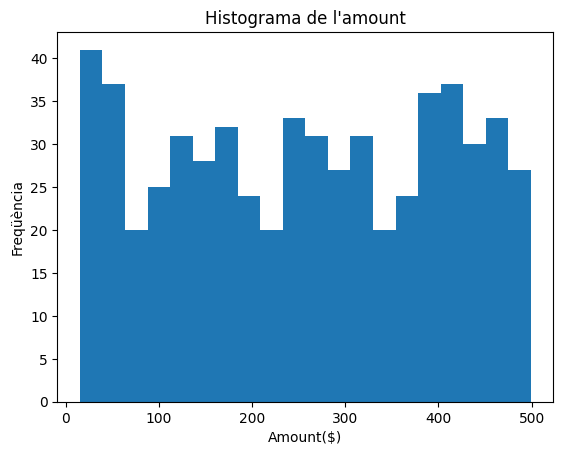

In [ ]:
# Importo sempre pandas per poder carregar cada caixa de forma independent
import pandas as pd
import matplotlib.pyplot as plt
transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
transaccio = transaccio[transaccio["declined"] == 0]

plt.hist(x= transaccio["amount"], bins= 20)
plt.title("Histograma de l'amount")
plt.xlabel("Amount($)")
plt.ylabel("Freqüència")
plt.show()



Es pot observar que hi ha quatre pics on es realitzen més transaccions d'una determinada quantitat. El màxim es troba en quantitats petites.

### Exercici 2
Dues variables numèriques.

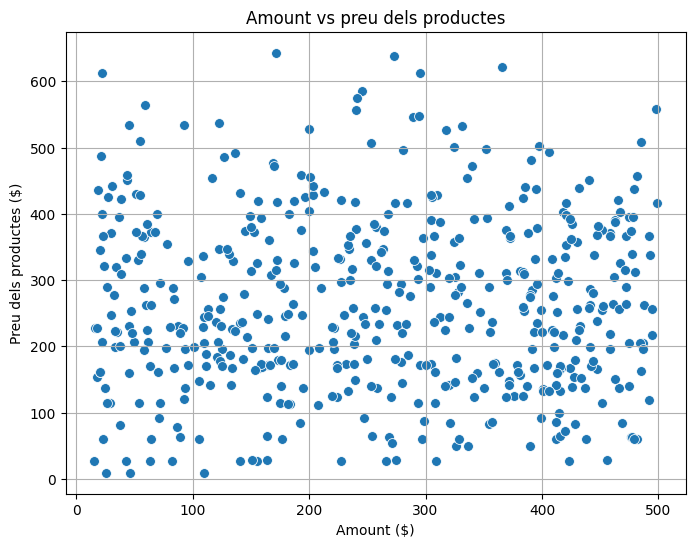

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
prodxtrans = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\prodxtrans.csv")
productes = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\productes.csv")
transaccio = transaccio[transaccio["declined"] == 0]


merge1 = pd.merge(transaccio,prodxtrans, left_on= "id", right_on="id_transaccio")
merge2 = pd.merge(merge1, productes, left_on= "product_id", right_on="id")
merge2 =  merge2[["id_x","amount","price"]]
merge2["price"]= merge2["price"].str.replace('$', '', regex=False)
merge2["price"]= merge2["price"].astype(float)
merge2 = merge2.groupby(["id_x","amount"]).price.sum().reset_index()
merge2

plt.figure(figsize=(8,6))
sns.scatterplot(data=merge2, x='amount', y='price', s=50)

# Puedes añadir detalles con matplotlib, por ejemplo, título, etiquetas, cuadrícula
plt.title('Amount vs preu dels productes')
plt.xlabel('Amount ($)')
plt.ylabel('Preu dels productes ($)')
plt.grid(True)
plt.show()

        

Quan es fa un scatterplot no es pot diferenciar entre la suma dels preus del producte i l'amount. És un núvol de punts sense gaire sentit segurament pels descomptes o encariments en funció de múltiples factors desconeguts.

### Excercici 3
Una variable categòrica.

<function matplotlib.pyplot.show(close=None, block=None)>

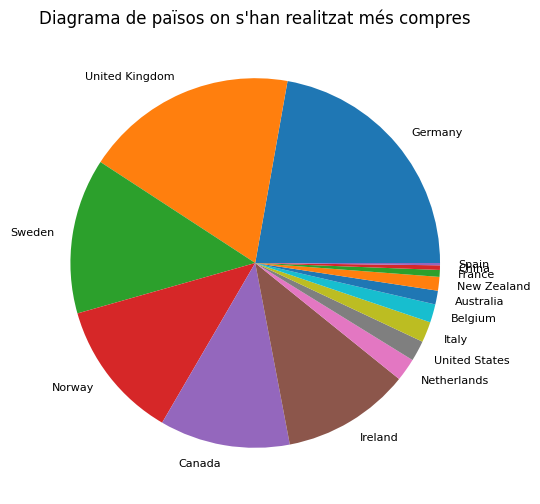

In [92]:
import pandas as pd
import matplotlib.pyplot as plt


transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
companyies = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\companyies.csv")
transaccio = transaccio[transaccio["declined"] == 0]


companyies_pais = companyies[["company_id","country"]]
companyies_pais

transaccio_amount = transaccio[["id","bussines_id","amount"]]
transaccio_amount

merge_trans_comp = pd.merge(transaccio_amount, companyies_pais, left_on="bussines_id", right_on="company_id")
merge_trans_comp 

merge_trans_comp= merge_trans_comp[["id","company_id","country","amount"]]
merge_trans_comp

recompte_paisos = merge_trans_comp.groupby("country")[["id"]].count().sort_values(by="id",ascending=False).reset_index()
recompte_paisos

plt.figure(figsize=(6,6))
plt.pie(recompte_paisos["id"], labels=recompte_paisos["country"], labeldistance =1.1, textprops={"fontsize":8} )
plt.title("Diagrama de països on s'han realitzat més compres", loc="center")
plt.show




Diagrama on s'aprecien els diferents països on s'han realitzat més transaccions.

### Exercici 4
Una variable categòrica i una numèrica.

Index([5, 13, 12, 6, 10, 2, 14, 8, 7, 1, 0, 9, 4, 3, 11], dtype='int64')

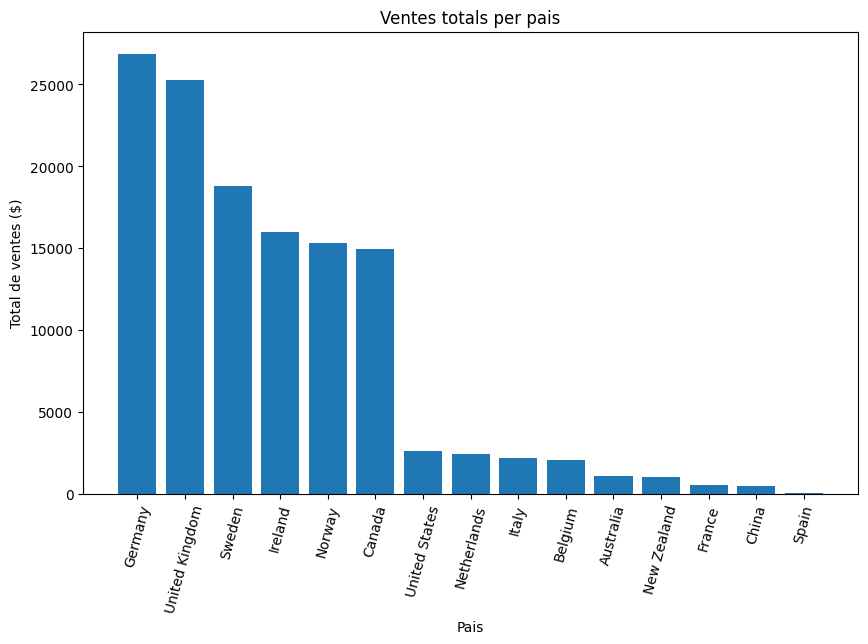

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

#Fet a partir del gràfic realitzat anteriorment per economitzar codi
paisos_total = merge_trans_comp.groupby("country").amount.sum().reset_index().sort_values(by="amount",ascending=False)
paisos_total


plt.figure(figsize=(10,6))
plt.bar(paisos_total["country"], height=paisos_total["amount"])
plt.xticks(rotation=75)
plt.title('Ventes totals per pais')
plt.xlabel('Pais')
plt.ylabel('Total de ventes ($)')
plt.show
paisos_total.index

Diagrama de barres de les ventes totals per països.

### Exercici 5
Dues variables categòriques.

Text(0, 0.5, 'Quantitat')

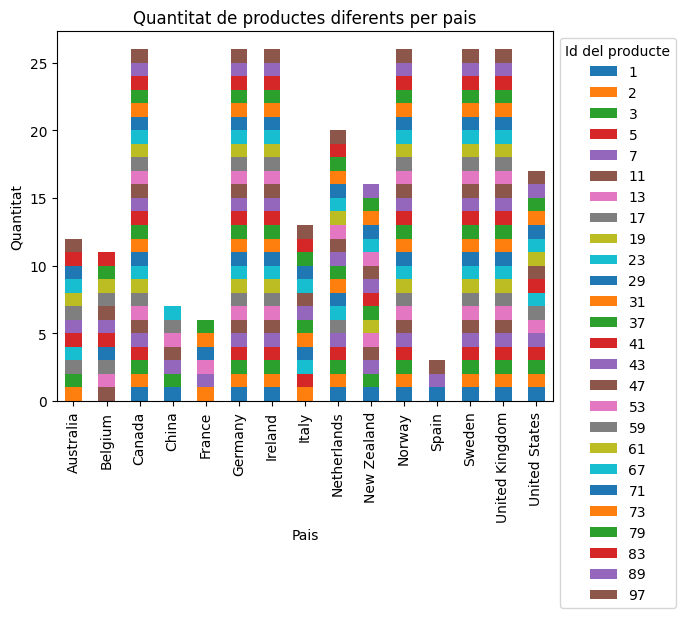

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#S'ha reutilitzat codi anterior per poder resoldre'l.

prodxtrans = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\prodxtrans.csv")
merge_trans_comp= merge_trans_comp[["id","company_id","country","amount"]]
merge_trans_comp

merge_amb_prodxtrans = pd.merge(merge_trans_comp,prodxtrans, left_on="id", right_on="id_transaccio")
merge_amb_prodxtrans = merge_amb_prodxtrans.drop(columns="id_transaccio")
paisos_productes = merge_amb_prodxtrans.groupby(["country","product_id"]).product_id.nunique()
paisos_productes = pd.DataFrame(paisos_productes)
paisos_productes = paisos_productes.rename(columns={"product_id":"quantitat"})
paisos_productes = paisos_productes.reset_index()
paisos_productes
cross_paisosproductes = pd.crosstab(paisos_productes["country"],paisos_productes["product_id"],values="quantitat",aggfunc='nunique')
cross_paisosproductes.plot(kind="bar", stacked=True)

plt.legend(title='Id del producte', bbox_to_anchor=(1, 1), loc="upper left")
plt.title('Quantitat de productes diferents per pais')
plt.xlabel('Pais')
plt.ylabel('Quantitat')

Diagrama de barres apilades amb la quantitat de productes diferents comprats a cada pais. El màxim de productes diferents comprats és de 26.

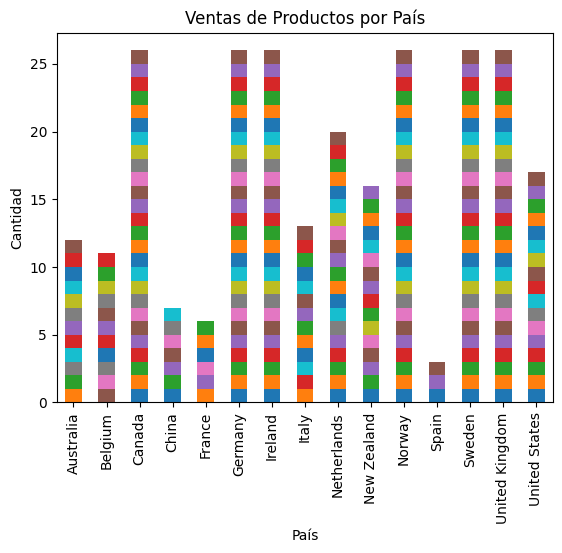

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

prodxtrans = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\prodxtrans.csv")
merge_trans_comp= merge_trans_comp[["id","company_id","country","amount"]]
merge_trans_comp

merge_amb_prodxtrans = pd.merge(merge_trans_comp,prodxtrans, left_on="id", right_on="id_transaccio")
merge_amb_prodxtrans = merge_amb_prodxtrans.drop(columns="id_transaccio")
paisos_productes = merge_amb_prodxtrans.groupby(["country","product_id"]).product_id.nunique()
paisos_productes = pd.DataFrame(paisos_productes)
paisos_productes = paisos_productes.rename(columns={"product_id":"quantitat"})
paisos_productes = paisos_productes.reset_index()
paisos_productes

columnes_apilades = paisos_productes.pivot_table(index="country", columns="product_id", values="quantitat", fill_value=0)
columnes_apilades.plot(kind="bar",stacked=True)
plt.title('Ventas de Productos por País')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.legend().set_visible(False)
plt.show()
# paisos_productes.groupby("country").plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')





### Exercici 6
Tres variables.

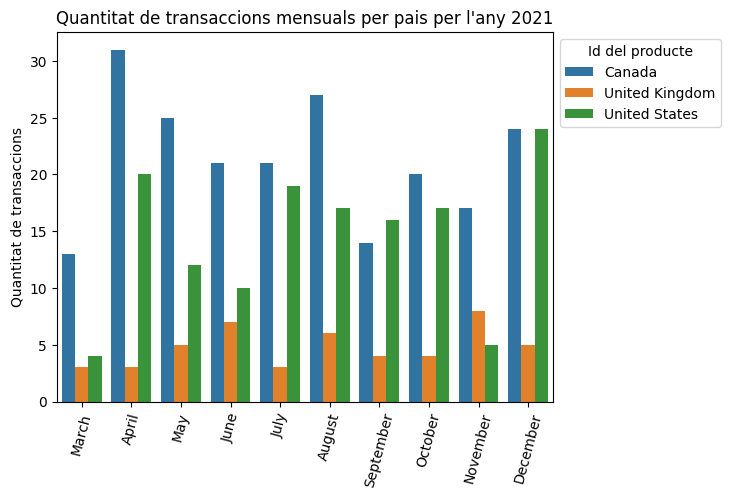

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#py -3.13 -m pip install seaborn

#TRANSACCIONES POR PAIS DE USUARIOS POR MES POR PARA EL 2021

transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
usuaris = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\usuaris.csv")

transusuaris = pd.merge(transaccio,usuaris, left_on="user_id", right_on="id")
transusuaris = transusuaris[["id_x","timestamp","country","declined"]]
transusuaris["timestamp"] = pd.to_datetime(transusuaris["timestamp"])
transusuaris["Mes"] = transusuaris["timestamp"].dt.month
transusuaris["Año"] = transusuaris["timestamp"].dt.year
transusuaris["MesLetras"] = transusuaris["timestamp"].dt.strftime("%B")
transusuaris = transusuaris[transusuaris["Año"] == 2021]
transusuaris = transusuaris[transusuaris["declined"] == 0]
transusuaris_pais_mes = transusuaris.groupby(["Mes","MesLetras","country"]).id_x.count()
transusuaris_pais_mes = pd.DataFrame(transusuaris_pais_mes).reset_index()
transusuaris_pais_mes

sns.barplot(x = transusuaris_pais_mes["MesLetras"], y = transusuaris_pais_mes["id_x"],
            hue = transusuaris_pais_mes["country"])
plt.legend(title='Id del producte', bbox_to_anchor=(1, 1), loc="upper left")
plt.title('Quantitat de transaccions mensuals per pais per l\'any 2021')
plt.xlabel(None)
plt.ylabel('Quantitat de transaccions')
plt.xticks(rotation=75)
plt.show()




Quantitat de transaccions mensuals per pais dels usuaris. Remarcar que la quantitat de transaccions es força inferior al Regne Unit.

### Exercici 7
Graficar un Pairplot.

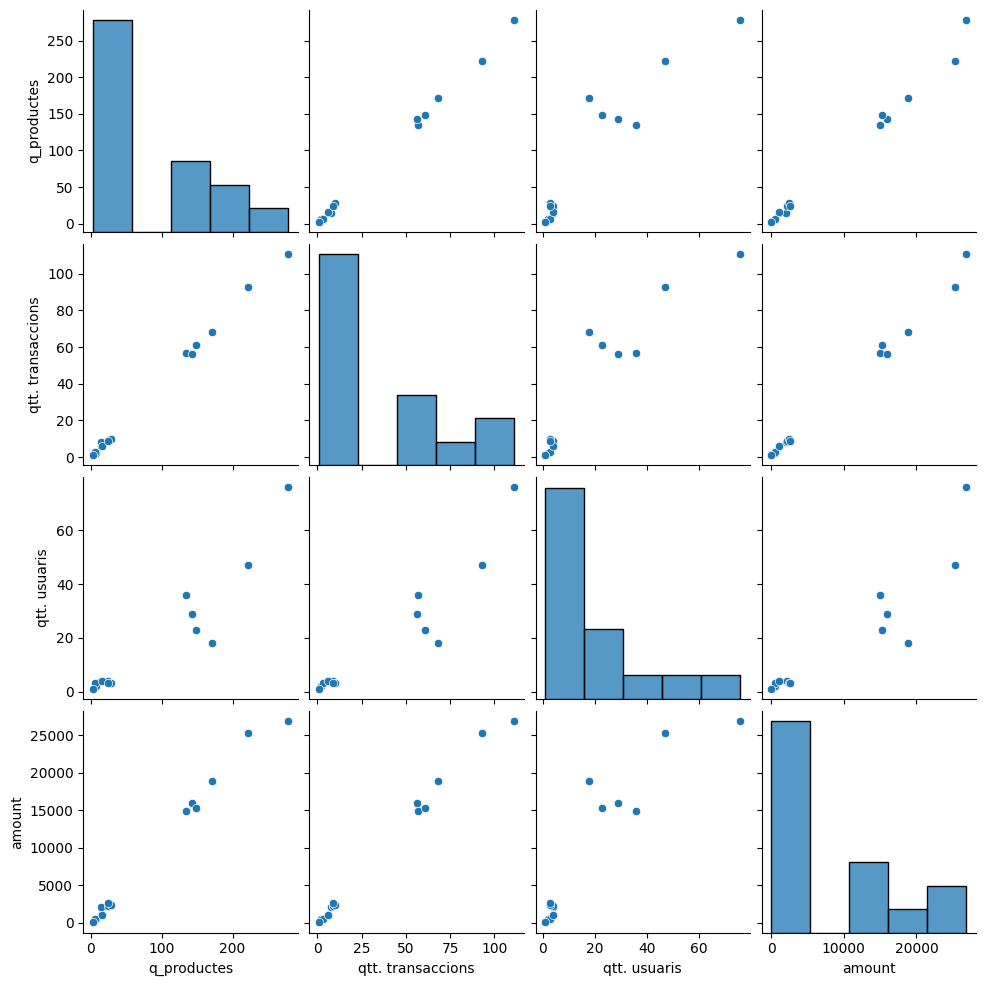

In [100]:
#numero transacciones
#numero de usuarios
#amount de transacciones
#todo esto por paises (un dataframe agrupado por paises)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def recompte_productes(x):
    x = x.split(",")
    if len(x) > 1:
        x = len(x)
    else:
        x = 1
    return x

#PAIRPLOT DE TRANSACCIONES, USUARIOS Y CANTIDADES POR PAISES 

transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
companyies = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\companyies.csv")
transaccio["q_productes"] = transaccio["products_ids"].apply(recompte_productes)


transcomp = pd.merge(transaccio,companyies, left_on="bussines_id", right_on="company_id")
transcomp = transcomp[["id","amount","user_id","q_productes","declined","country"]]
transcomp = transcomp[transcomp["declined"] == 0]

trans_country = transcomp.groupby('country').agg({
    'q_productes': 'sum',
    'id': 'count',
    'user_id': 'nunique',
    'amount': 'sum'
}).reset_index()
trans_country = trans_country.rename(columns={"id":"qtt. transaccions","user_id":"qtt. usuaris",})
trans_country
g = sns.pairplot(trans_country, diag_kind="hist")
plt.show()




En aquest pairplot es poden observar diferents mesures calculades dels diferents països. Les mesures serien les ventes totals (amount), la quantitat de transaccions, la quantitat de productes i la quantitat d'usuaris (diferents).

# Nivell 2
### Exercici 1
Correlació de totes les variables numèriques.

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'qtt. transaccions'),
  Text(1.5, 0, 'qtt. usuaris'),
  Text(2.5, 0, 'amount'),
  Text(3.5, 0, 'q_productes')])

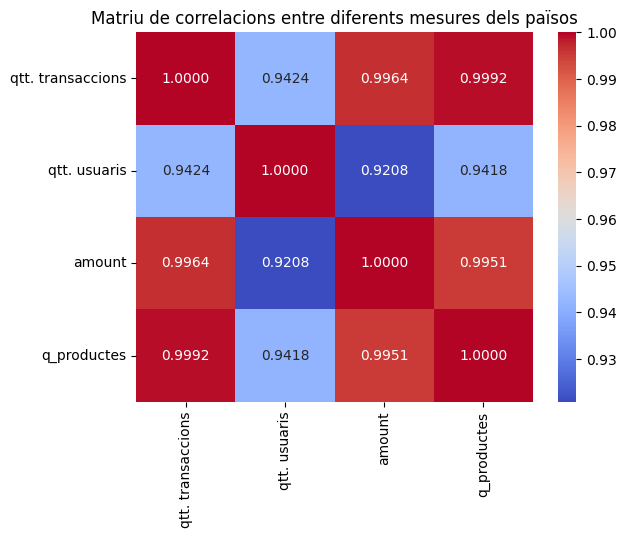

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def recompte_productes(x):
    x = x.split(",")
    if len(x) > 1:
        x = len(x)
    else:
        x = 1
    return x

#MAPA DE CORRELACIONS DE TRANSACCIONS, USUARIS Y QUANTITATS PER PAIS 

transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
companyies = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\companyies.csv")
transaccio["q_productes"] = transaccio["products_ids"].apply(recompte_productes)


transcomp = pd.merge(transaccio,companyies, left_on="bussines_id", right_on="company_id")
transcomp = transcomp[["id","amount","user_id","q_productes","declined","country"]]
transcomp = transcomp[transcomp["declined"] == 0]


trans_country = transcomp.groupby('country').agg({
    'q_productes': 'sum',
    'id': 'count',
    'user_id': 'nunique',
    'amount': 'sum'
}).reset_index()
trans_country = trans_country.rename(columns={"id":"qtt. transaccions","user_id":"qtt. usuaris",})
matriu = trans_country[["qtt. transaccions","qtt. usuaris","amount","q_productes"]]
matriu = matriu.corr()
matriu

sns.heatmap(matriu, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Matriu de correlacions entre diferents mesures dels països")
plt.xticks(rotation = 90)

En aquesta matriu de corrlacions, o heatmap, es poden observar les diferents correlacions entre les mesures obtingudes a l'Exercici 7 del Nivell 1. Totes elles estan molt positivament correlacionades.

### Exercici 2
Implementa un jointplot.   

Text(0.5, 1.2, 'Quantitat de transaccions vs ventes totals')

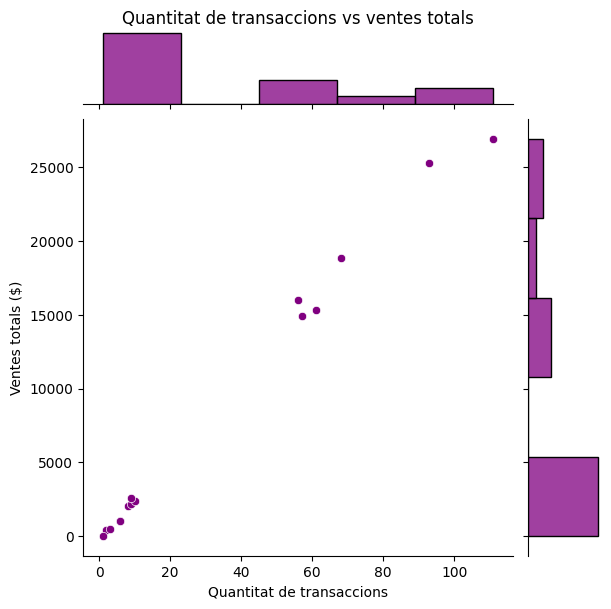

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def recompte_productes(x):
    x = x.split(",")
    if len(x) > 1:
        x = len(x)
    else:
        x = 1
    return x

#MAPA DE CORRELACIONS DE TRANSACCIONS, USUARIS Y QUANTITATS PER PAIS 

transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
companyies = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\companyies.csv")
transaccio["q_productes"] = transaccio["products_ids"].apply(recompte_productes)


transcomp = pd.merge(transaccio,companyies, left_on="bussines_id", right_on="company_id")
transcomp = transcomp[["id","amount","user_id","q_productes","declined","country"]]
transcomp = transcomp[transcomp["declined"] == 0]

trans_country = transcomp.groupby('country').agg({
    'q_productes': 'sum',
    'id': 'count',
    'user_id': 'nunique',
    'amount': 'sum'
}).reset_index()
trans_country = trans_country.rename(columns={"id":"qtt. transaccions","user_id":"qtt. usuaris",})

sns.jointplot(data= trans_country, x="qtt. transaccions", y="amount", kind="scatter", color= "purple")
plt.xlabel("Quantitat de transaccions")
plt.ylabel("Ventes totals ($)")
plt.title("Quantitat de transaccions vs ventes totals", y=1.2)


Jointplot construit a partir d'un scatterplot i els histogrames de la distribució dels punts dels diferents eixos. Es comparen la quantitat de transaccions realitzades respecte les ventes totals.

# Nivell 3
### Exercici 1
Implementa un violinplot combinat amb un altre tipus de gràfic.

C:\Users\favil\AppData\Local\Temp\ipykernel_58788\3018328477.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=transusuaris, x='country', y='amount', ax=ax1, palette=colors)


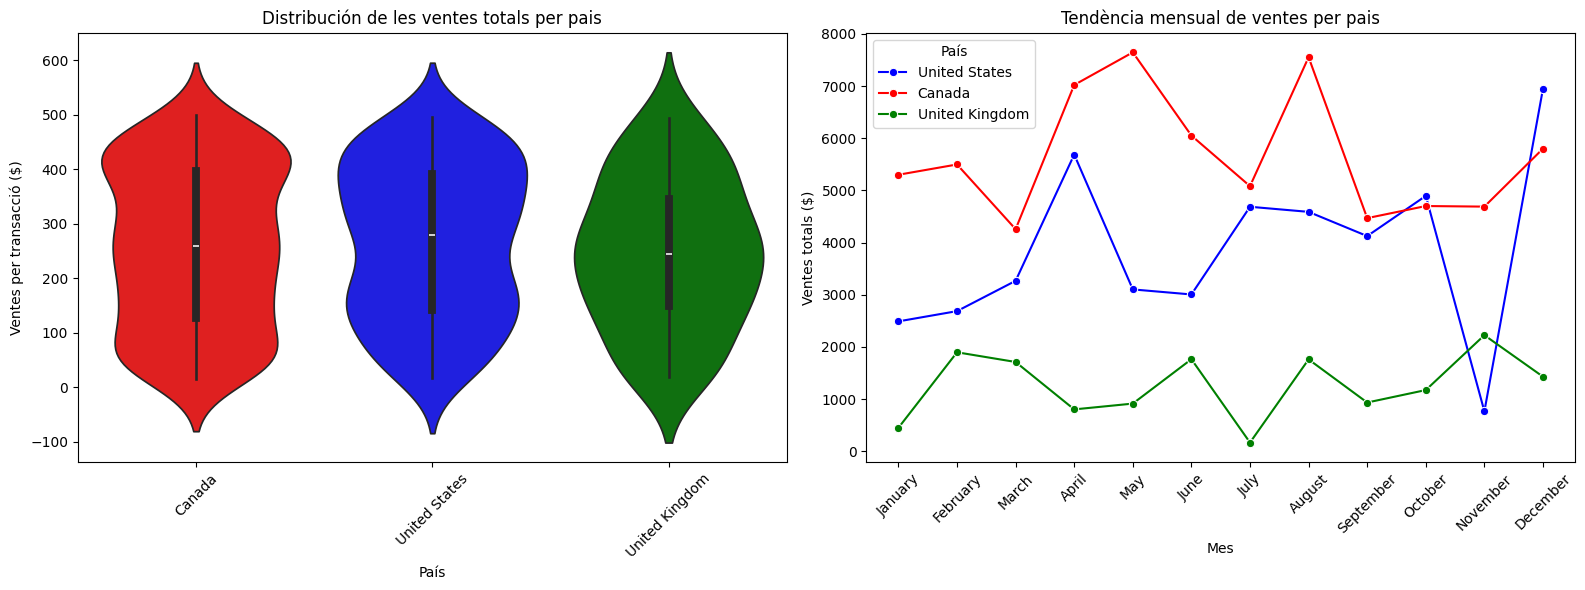

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
usuaris = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\usuaris.csv")
transusuaris = pd.merge(transaccio,usuaris, left_on="user_id", right_on="id")
transusuaris = transusuaris[["id_x","timestamp","country","amount","declined","user_id"]]
transusuaris["timestamp"] = pd.to_datetime(transusuaris["timestamp"])
transusuaris["Mes"] = transusuaris["timestamp"].dt.month
transusuaris = transusuaris.sort_values(by="Mes")
transusuaris["MesLetras"] =  transusuaris["timestamp"].dt.strftime("%B")

transusuaris = transusuaris[transusuaris["declined"] == 0]

colors = {
    'Canada': 'red',
    'United States': 'blue',
    'United Kingdom': 'green',
}

# Crear figura con 1 fila y 2 columnas (dos gráficos)

ventes_mensuals = transusuaris.groupby(['MesLetras','Mes', 'country'])['amount'].sum().reset_index().sort_values(by="Mes")

fig = plt.figure(figsize=(16, 6))

ax1 = fig.add_subplot(1, 2, 1)
sns.violinplot(data=transusuaris, x='country', y='amount', ax=ax1, palette=colors)
ax1.set_title("Distribución de les ventes totals per pais")
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel("Ventes per transacció ($)")
ax1.set_xlabel("País")

ax2 = fig.add_subplot(1, 2, 2)
sns.lineplot(data=ventes_mensuals, x='MesLetras', y='amount', hue='country',palette=colors, marker='o', ax=ax2)
ax2.set_title("Tendència mensual de ventes per pais")
ax2.set_xlabel("Mes")
ax2.set_ylabel("Ventes totals ($)")
ax2.tick_params(axis='x', rotation=45)
ax2.legend(title="País")

plt.tight_layout()
plt.show()




En aquest cas s'han fet dues gràfiques, un violinplot i una de línies. En els dos casos s'han agrupat les dades entre països d'origen dels usuaris per així poder-les comparar. La gràfica de tendències considera els mesos l'any econòmic (de març del 2021 fins al març del 2022, per tant no és un any natural) i avalua com han estat les ventes totals cada mes als dos paisos.

### Exercici 2
Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.

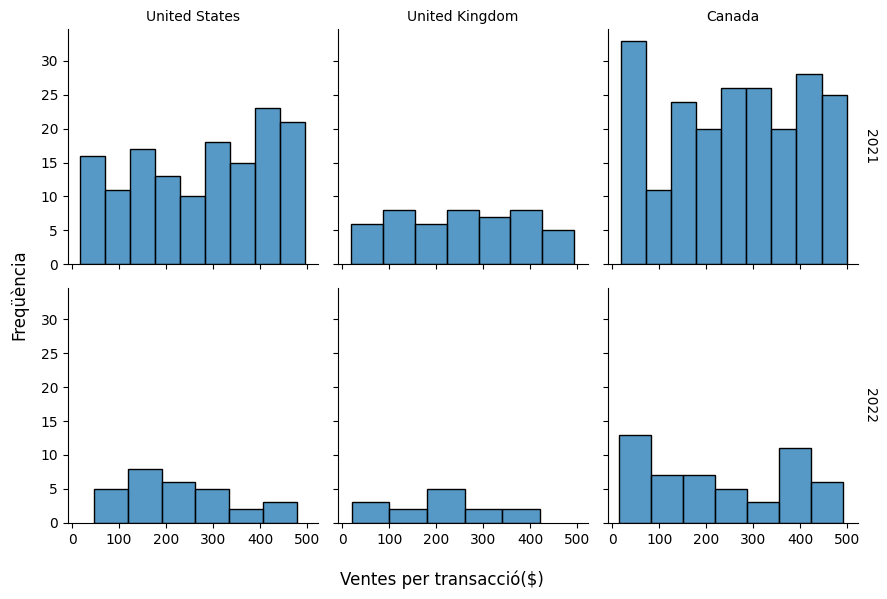

In [122]:
# Distribució d'amount per països d'usuari en els dos anys 2021 i 2022

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transaccio = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\transaccio.csv")
usuaris = pd.read_csv(r"C:\Users\favil\OneDrive\Escritorio\IT_Academy\Especialitzacio\Sprint 8\usuaris.csv")
transaccio = transaccio[transaccio["declined"] == 0]
transusuaris = pd.merge(transaccio,usuaris, left_on="user_id", right_on="id")
transusuaris = transusuaris[["id_x","timestamp","country","amount","declined","user_id"]]
transusuaris["timestamp"] = pd.to_datetime(transusuaris["timestamp"])
transusuaris["Año"] = transusuaris["timestamp"].dt.year
transusuaris

g = sns.FacetGrid(transusuaris, col="country",  row="Año", margin_titles=True)
g.map_dataframe(sns.histplot, x="amount")
g.set_axis_labels("", "")
g.figure.subplots_adjust(left=0.08, bottom=0.08, right=0.95, top=0.95)
g.figure.supxlabel("Ventes per transacció($)", fontsize=12)
g.figure.supylabel("Freqüència", fontsize=12)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.tight_layout()
plt.show()



FaceGrid d'histogrames de la distribució de ventes deglossat per país dels usuaris i per any natural. A grans trets s'observa una menor quantitat de transaccions l'any 2022. Canada és el pais amb més transaccions en general.